In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
colnames=['Area','Rooms','Price']
dataset = pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/refs/heads/master/ex1data2.txt", names=colnames)

In [5]:
dataset
#If we do not specify the columns names, it will use the first entry raw as column name by default

,Area,Rooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [6]:
dataset.describe()

,Area,Rooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [7]:
Area=dataset.iloc[0:dataset.shape[0],0:1]
Rooms=dataset.iloc[0:dataset.shape[0],1:2]
Price=dataset.iloc[0:dataset.shape[0],2:3]
#Spliting the data in three parts

In [8]:
#Function of normalization
def feature_normalization(x):
  mean=np.mean(x,axis=0)
  std=np.std(x,axis=0)
  X_normalized=(x-mean)/std
  return X_normalized,mean,std

In [9]:
data_norm=dataset.values
m=data_norm.shape[0] #Number of observations
#Take the features vectors
x2=data_norm[:,0:2].reshape(m,2)
x2_norm,mean,std=feature_normalization(x2)

y2=data_norm[:,2:3].reshape(m,1) #price column

In [10]:
x2_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [11]:
theta_array = np.zeros((3,1))

In [12]:
#Linear Regression
def hypothesis(theta_array, x_1,x_2):
  return theta_array[0]+theta_array[1]*x_1+theta_array[2]*x_2

In [19]:
def cost_function(theta_array,x_1,x_2,y,m):
  errors = 0
  for i in range(m):
    errors+=((theta_array[0]+theta_array[1]*x_1[i]+theta_array[2]*x_2[i])-y[i])**2
  return (1/2*m)*errors

In [20]:
#Implementing the Gradient descent functions
def gradient_descent(theta_array,x_1,x_2,y,m,alpha):
  error_1 = 0
  error_2 = 0
  error_3 = 0
  for i in range(m):
    error_1 += ((theta_array[0]+theta_array[1]*x_1[i]+theta_array[2]*x_2[i])-y[i])
    error_2 += x_1[i]*((theta_array[0]+theta_array[1]*x_1[i]+theta_array[2]*x_2[i])-y[i])
    error_3 += x_2[i]*((theta_array[0]+theta_array[1]*x_1[i]+theta_array[2]*x_2[i])-y[i])

  new_theta1 = theta_array[0]-(alpha/m)*error_1
  new_theta2 = theta_array[0]-(alpha/m)*error_2
  new_theta3 = theta_array[0]-(alpha/m)*error_3
  updated_new_theta = [new_theta1,new_theta2,new_theta3]
  return updated_new_theta

In [16]:
def training(x_1,x_2,y,alpha,iters):
  theta1 = 0
  theta2 = 0
  theta3 = 0
  cost_values = []
  theta_array=[theta1,theta2,theta3]
  m=data_norm.shape[0]

  # The gradient descent does the optimization of the training model
  for i in range(iters):
    theta_array = gradient_descent(theta_array,x_1,x_2,y,m,alpha)
    cost_values.append(cost_function(theta_array, x_1,x_2, y, m))
  return cost_values, theta_array

In [29]:
alpha = 0.01
iters = 50

In [30]:
cost,theta=training(x2_norm[:,0:1],x2_norm[:,1:2],y2,alpha,iters)

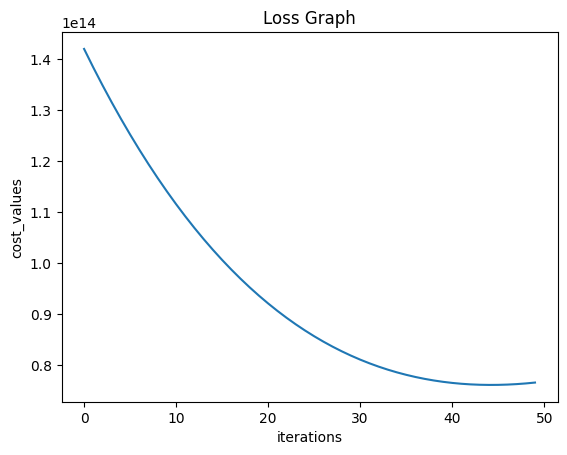

[array([134460.93520149]), array([131423.21504583]), array([130914.89868715])]


In [31]:
x_axis = np.arange(0, len(cost), step = 1)
plt.plot(x_axis, cost)
plt.xlabel('iterations')
plt.ylabel('cost_values')
plt.title('Loss Graph')
plt.show()

print(theta)

In [ ]:
#I need to make 4 functions generalized ones